# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**
rdkit= will allow you to compute the molecular descriptiors for the compounds in the dataset that we have compiled from part 1.

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-11-16 11:54:40--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   184MB/s    in 0.4s    

2023-11-16 11:54:40 (184 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

## **Load bioactivity data**

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/RUNX1_bioactivity_data_curated.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1339329,CCCOc1ccc(C2C(C(=O)OC)=CN(CCOC)C=C2C(=O)OC)cc1,2220.0,intermediate
1,CHEMBL1378709,CCCc1cc2c(OC(=O)CC)c(-c3ccc(C(=O)OCC)o3)c(=O)o...,5510.0,intermediate
2,CHEMBL1464508,Cc1cc2c(c(=O)n1CCc1ccccc1)C(c1ccco1)C(C#N)=C(N)O2,36300.0,inactive
3,CHEMBL1323994,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1ccc(Cl)s1,5460.0,intermediate
4,CHEMBL1338756,COc1cccc(-c2nc(-c3ccc4c(c3)-c3ccccc3S4(=O)=O)c...,33600.0,inactive
...,...,...,...,...
89,CHEMBL1364045,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1ccccc1F,50000.0,inactive
90,CHEMBL1453190,CCS(=O)(=O)Nc1ccc(-c2nc3cccnc3s2)cc1,12809.0,inactive
91,CHEMBL1353698,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1cccs1,3636.5,intermediate
92,CHEMBL1330155,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1cc(F)ccc1F,100000.0,inactive


In [4]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [6]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [7]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL1339329,2220.0,intermediate,CCCOc1ccc(C2C(C(=O)OC)=CN(CCOC)C=C2C(=O)OC)cc1
1,CHEMBL1378709,5510.0,intermediate,CCCc1cc2c(OC(=O)CC)c(-c3ccc(C(=O)OCC)o3)c(=O)o...
2,CHEMBL1464508,36300.0,inactive,Cc1cc2c(c(=O)n1CCc1ccccc1)C(c1ccco1)C(C#N)=C(N)O2
3,CHEMBL1323994,5460.0,intermediate,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1ccc(Cl)s1
4,CHEMBL1338756,33600.0,inactive,COc1cccc(-c2nc(-c3ccc4c(c3)-c3ccccc3S4(=O)=O)c...
...,...,...,...,...
89,CHEMBL1364045,50000.0,inactive,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1ccccc1F
90,CHEMBL1453190,12809.0,inactive,CCS(=O)(=O)Nc1ccc(-c2nc3cccnc3s2)cc1
91,CHEMBL1353698,3636.5,intermediate,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1cccs1
92,CHEMBL1330155,100000.0,inactive,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1cc(F)ccc1F


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:(all the values are multiple fo 5)
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [8]:
!pip install rdkit

     |████████████████████████████████| 29.5 MB 1.3 MB/s 


In [9]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [10]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False): # def lipinski, custom function to perform the desired analysis, and smiles notation contains the chemical information(is the exact atomic details of the molecule)

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [11]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,389.448,2.6348,0.0,7.0
1,428.437,4.5062,0.0,8.0
2,373.412,3.2106,1.0,6.0
3,407.929,4.8740,1.0,6.0
4,494.572,6.2411,1.0,5.0
...,...,...,...,...
89,385.445,4.2982,1.0,5.0
90,319.411,3.1199,1.0,5.0
91,373.484,4.2206,1.0,6.0
92,403.435,4.4373,1.0,5.0


4 molecular descriptors:
1. MW: Molecular weight
2. logP: Solubility
3. NumHDonors: relative number of H-bond donors
4. NumHAcceptors: relative number of H-bond acceptors


In [12]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,389.448,2.6348,0.0,7.0
1,428.437,4.5062,0.0,8.0
2,373.412,3.2106,1.0,6.0
3,407.929,4.8740,1.0,6.0
4,494.572,6.2411,1.0,5.0
...,...,...,...,...
89,385.445,4.2982,1.0,5.0
90,319.411,3.1199,1.0,5.0
91,373.484,4.2206,1.0,6.0
92,403.435,4.4373,1.0,5.0


In [13]:
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL1339329,CCCOc1ccc(C2C(C(=O)OC)=CN(CCOC)C=C2C(=O)OC)cc1,2220.0,intermediate
1,CHEMBL1378709,CCCc1cc2c(OC(=O)CC)c(-c3ccc(C(=O)OCC)o3)c(=O)o...,5510.0,intermediate
2,CHEMBL1464508,Cc1cc2c(c(=O)n1CCc1ccccc1)C(c1ccco1)C(C#N)=C(N)O2,36300.0,inactive
3,CHEMBL1323994,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1ccc(Cl)s1,5460.0,intermediate
4,CHEMBL1338756,COc1cccc(-c2nc(-c3ccc4c(c3)-c3ccccc3S4(=O)=O)c...,33600.0,inactive


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [14]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [15]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1339329,CCCOc1ccc(C2C(C(=O)OC)=CN(CCOC)C=C2C(=O)OC)cc1,2220.0,intermediate,389.448,2.6348,0.0,7.0
1,CHEMBL1378709,CCCc1cc2c(OC(=O)CC)c(-c3ccc(C(=O)OCC)o3)c(=O)o...,5510.0,intermediate,428.437,4.5062,0.0,8.0
2,CHEMBL1464508,Cc1cc2c(c(=O)n1CCc1ccccc1)C(c1ccco1)C(C#N)=C(N)O2,36300.0,inactive,373.412,3.2106,1.0,6.0
3,CHEMBL1323994,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1ccc(Cl)s1,5460.0,intermediate,407.929,4.8740,1.0,6.0
4,CHEMBL1338756,COc1cccc(-c2nc(-c3ccc4c(c3)-c3ccccc3S4(=O)=O)c...,33600.0,inactive,494.572,6.2411,1.0,5.0
...,...,...,...,...,...,...,...,...
89,CHEMBL1364045,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1ccccc1F,50000.0,inactive,385.445,4.2982,1.0,5.0
90,CHEMBL1453190,CCS(=O)(=O)Nc1ccc(-c2nc3cccnc3s2)cc1,12809.0,inactive,319.411,3.1199,1.0,5.0
91,CHEMBL1353698,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1cccs1,3636.5,intermediate,373.484,4.2206,1.0,6.0
92,CHEMBL1330155,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1cc(F)ccc1F,100000.0,inactive,403.435,4.4373,1.0,5.0


Convert the standard_value which is the IC50 to PIC50 scale which is the negative logarithmic transformation.

IC50 has uneven distribution of the datapoints so to make it more even we are applying negative transformation

### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [16]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [17]:
df_combined.standard_value.describe()

count        94.000000
mean      37519.515957
std       41812.635784
min         195.000000
25%        2755.000000
50%       12954.500000
75%      100000.000000
max      100000.000000
Name: standard_value, dtype: float64

In [18]:
-np.log10((10**-9)* 100000000)

1.0

In [19]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [20]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-19-c8e03533cbc3>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL1339329,CCCOc1ccc(C2C(C(=O)OC)=CN(CCOC)C=C2C(=O)OC)cc1,intermediate,389.448,2.6348,0.0,7.0,2220.0
1,CHEMBL1378709,CCCc1cc2c(OC(=O)CC)c(-c3ccc(C(=O)OCC)o3)c(=O)o...,intermediate,428.437,4.5062,0.0,8.0,5510.0
2,CHEMBL1464508,Cc1cc2c(c(=O)n1CCc1ccccc1)C(c1ccco1)C(C#N)=C(N)O2,inactive,373.412,3.2106,1.0,6.0,36300.0
3,CHEMBL1323994,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1ccc(Cl)s1,intermediate,407.929,4.8740,1.0,6.0,5460.0
4,CHEMBL1338756,COc1cccc(-c2nc(-c3ccc4c(c3)-c3ccccc3S4(=O)=O)c...,inactive,494.572,6.2411,1.0,5.0,33600.0
...,...,...,...,...,...,...,...,...
89,CHEMBL1364045,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1ccccc1F,inactive,385.445,4.2982,1.0,5.0,50000.0
90,CHEMBL1453190,CCS(=O)(=O)Nc1ccc(-c2nc3cccnc3s2)cc1,inactive,319.411,3.1199,1.0,5.0,12809.0
91,CHEMBL1353698,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1cccs1,intermediate,373.484,4.2206,1.0,6.0,3636.5
92,CHEMBL1330155,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1cc(F)ccc1F,inactive,403.435,4.4373,1.0,5.0,100000.0


In [21]:
df_norm.standard_value_norm.describe()

count        94.000000
mean      37519.515957
std       41812.635784
min         195.000000
25%        2755.000000
50%       12954.500000
75%      100000.000000
max      100000.000000
Name: standard_value_norm, dtype: float64

In [22]:
df_final = pIC50(df_norm)
df_final

<ipython-input-16-62152670485b>:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1339329,CCCOc1ccc(C2C(C(=O)OC)=CN(CCOC)C=C2C(=O)OC)cc1,intermediate,389.448,2.6348,0.0,7.0,5.653647
1,CHEMBL1378709,CCCc1cc2c(OC(=O)CC)c(-c3ccc(C(=O)OCC)o3)c(=O)o...,intermediate,428.437,4.5062,0.0,8.0,5.258848
2,CHEMBL1464508,Cc1cc2c(c(=O)n1CCc1ccccc1)C(c1ccco1)C(C#N)=C(N)O2,inactive,373.412,3.2106,1.0,6.0,4.440093
3,CHEMBL1323994,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1ccc(Cl)s1,intermediate,407.929,4.8740,1.0,6.0,5.262807
4,CHEMBL1338756,COc1cccc(-c2nc(-c3ccc4c(c3)-c3ccccc3S4(=O)=O)c...,inactive,494.572,6.2411,1.0,5.0,4.473661
...,...,...,...,...,...,...,...,...
89,CHEMBL1364045,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1ccccc1F,inactive,385.445,4.2982,1.0,5.0,4.301030
90,CHEMBL1453190,CCS(=O)(=O)Nc1ccc(-c2nc3cccnc3s2)cc1,inactive,319.411,3.1199,1.0,5.0,4.892485
91,CHEMBL1353698,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1cccs1,intermediate,373.484,4.2206,1.0,6.0,5.439316
92,CHEMBL1330155,O=S(=O)(Nc1ccc(-c2nc3cccnc3s2)cc1)c1cc(F)ccc1F,inactive,403.435,4.4373,1.0,5.0,4.000000


In [23]:
df_final.pIC50.describe()

count    94.000000
mean      4.932009
std       0.813129
min       4.000000
25%       4.000000
50%       4.887607
75%       5.560049
max       6.709965
Name: pIC50, dtype: float64

Let's write this to CSV file.

In [24]:
df_final.to_csv('RUNX1_bioactivity_data_class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [27]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL1464508,Cc1cc2c(c(=O)n1CCc1ccccc1)C(c1ccco1)C(C#N)=C(N)O2,inactive,373.412,3.21060,1.0,6.0,4.440093
4,CHEMBL1338756,COc1cccc(-c2nc(-c3ccc4c(c3)-c3ccccc3S4(=O)=O)c...,inactive,494.572,6.24110,1.0,5.0,4.473661
6,CHEMBL1468099,Oc1ccc(-c2cnns2)c(O)c1,inactive,194.215,1.61630,2.0,5.0,4.501689
7,CHEMBL1467976,O=C(COC(=O)c1c2c(nc3ccccc13)/C(=C/c1ccco1)CC2)...,inactive,416.477,4.53020,1.0,5.0,4.000000
10,CHEMBL3190303,C/C(=N\Nc1nc(-c2cc(C)ccc2C)cs1)c1cc2c(ccc3cccc...,inactive,439.540,6.52264,1.0,6.0,4.000000
11,CHEMBL1613571,CN1c2ccsc2C(O)=C(C(S)=Nc2ccc(F)c(Cl)c2)S1(=O)=O,inactive,404.897,4.20680,2.0,5.0,4.000000
13,CHEMBL1426072,Cc1cccn2c(=O)c(/C=C(\C#N)C(N)=O)c(N3CCN(Cc4ccc...,inactive,472.505,1.44610,1.0,9.0,4.000000
14,CHEMBL1299795,CCOc1cc(C2C3=C(CCCC3=O)N(CCC(=O)O)C3=C2C(=O)CC...,active,579.671,5.04952,1.0,8.0,6.201349
15,CHEMBL1349913,Cc1cccn2c(=O)c(/C=C(\C#N)C(=O)NCc3ccco3)c(N3CC...,inactive,460.494,1.52100,2.0,8.0,4.000000
16,CHEMBL1555914,Cc1ccc(S(=O)(=O)Oc2ccc(C3C4=C(CCCC4=O)N(CCC(=O...,active,570.063,5.30422,1.0,7.0,6.405607


Let's write this to CSV file.

In [28]:
df_2class.to_csv('RUNX1_bioactivity_data_class_1_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [32]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

Text(0, 0.5, 'Frequency')

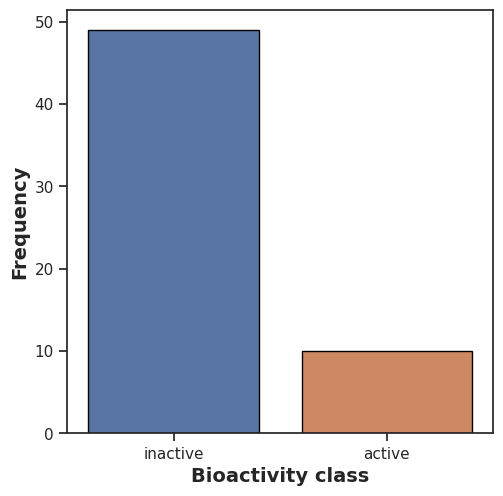

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
# plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

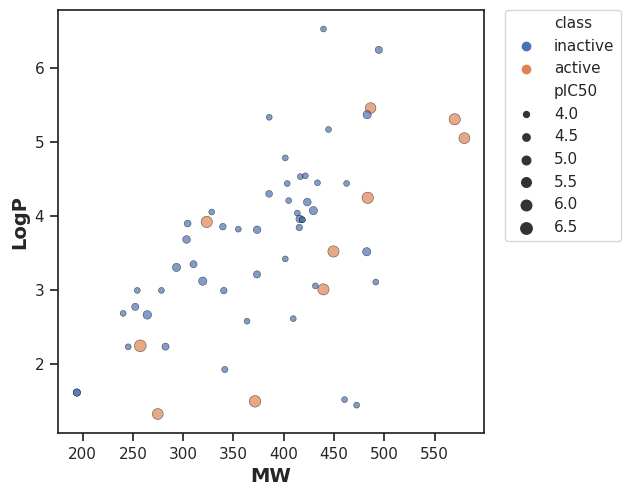

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

### **Box plots**

#### **pIC50 value**

Text(0, 0.5, 'pIC50 value')

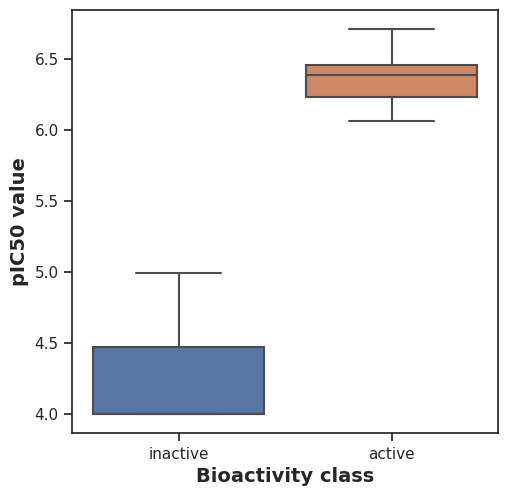

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

Negative logarithmic transformation of IC50 value which is pIC50 value can be seen more in active molecules compared to inactive molecules & the threshold of pIC50 is 5; <= active and 5 >= inactive.

**Statistical analysis | Mann-Whitney U Test**

In [36]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [37]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,490.0,2.399050e-07,0.05,Different distribution (reject H0)


#### **MW**

Text(0, 0.5, 'MW')

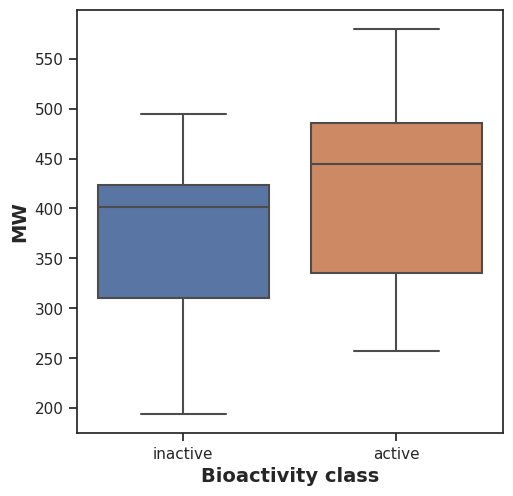

In [38]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

In [39]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,321.0,0.127166,0.05,Same distribution (fail to reject H0)


#### **LogP**

Text(0, 0.5, 'LogP')

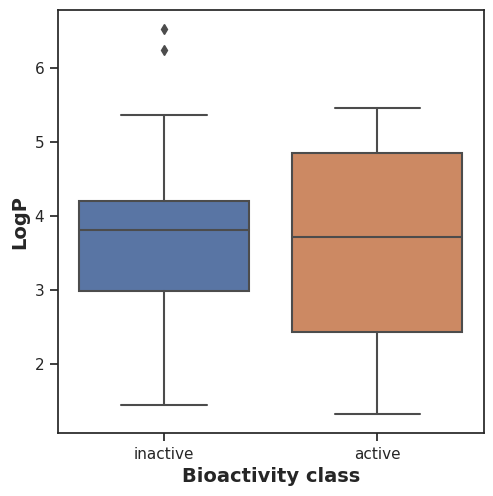

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

**Statistical analysis | Mann-Whitney U Test**

In [41]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,248.0,0.959717,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

Text(0, 0.5, 'NumHDonors')

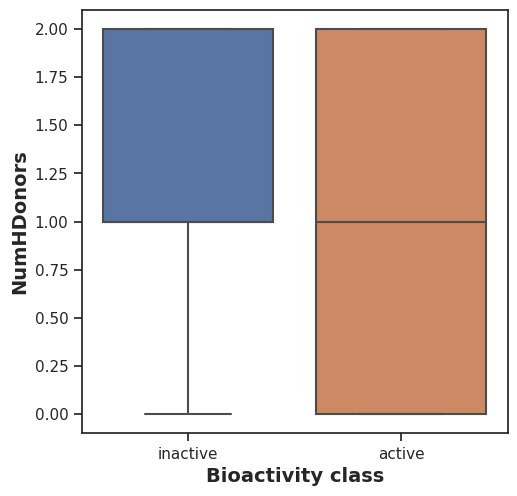

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

**Statistical analysis | Mann-Whitney U Test**

In [43]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,227.0,0.704952,0.05,Same distribution (fail to reject H0)


#### **NumHAcceptors**

Text(0, 0.5, 'NumHAcceptors')

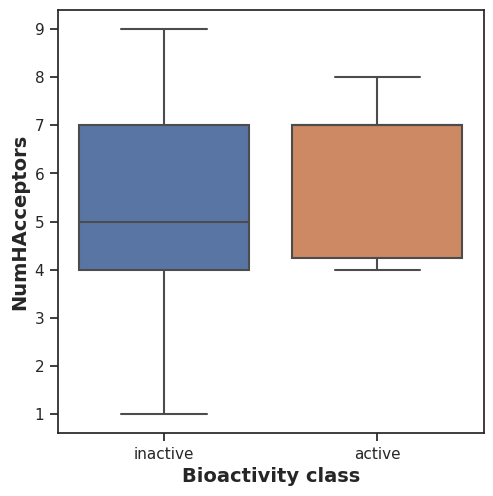

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

In [45]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,280.5,0.471911,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

## **Zip files**

In [46]:
# ! zip -r results.zip . -i *.csv *.pdf